In [2]:
from pymysql import connect
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import SGDClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [4]:
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import classification_report
import warnings
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [5]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


# Connection MySQL to Python

In [6]:
data_base=connect(host='localhost',
                    user='root',
                    passwd='Rutuja@123',
                    database='procurement')

In [7]:
cur=data_base.cursor()

In [8]:
q= 'select * from procurement.fraud_data'
cur.execute(q)

30000

In [9]:
df = pd.read_sql(q,data_base)
df.head(10)

,InvoiceID,PO_Id,Purchase_date,Vendor_name,Category,Name_Grocery,Item_Number,Quan_send_by_vendor,Quan_rec_by_procurement,Quan_send_by_procurement,Approval_oficer_name,Requesting_officer_name,Unit_Purchase_Price,Unit_Selling_price,Eligibility_Criteria,Total_purchase_price,Total_Selling_price,Fraud
0,545495149,PO001,2018-07-01,Garden fresh,Spices&Herbs,Cilantro,GR0034,68.5,68.5,68.5,Frank Green,Tyler Norris,79.2,83.6,YES,542520.0,572660.0,1
1,545495150,PO002,2018-07-01,puja vegetable shop,Baking,Vegetable Oil,GR0065,77.4,76.5,76.5,Phillip Johnson,Thomas Patrick,86.7,86.9,YES,663255.0,664785.0,1
2,545495151,PO003,2018-07-01,Freshbazar,PersonalCare,Cosmetics,GR0070,75.4,75.4,75.4,Robert Hammond,Jose Holmes,51.7,52.7,YES,389818.0,397358.0,0
3,545495152,PO004,2018-07-01,Rupdasi market,Spices&Herbs,Cilantro,GR0034,66.6,66.6,66.6,Hannah Hernandez,Catherine Martinez,61.9,62.4,YES,412254.0,415584.0,0
4,545495153,PO005,2018-07-01,Rupdasi market,Spices&Herbs,Red pepper,GR0042,74.2,74.2,74.2,Jonathan Howard,Thomas Patrick,90.8,94.3,YES,673736.0,699706.0,1
5,545495154,PO006,2018-07-01,Green Tokri,Spices&Herbs,Mint,GR0038,79.4,79.4,79.4,Jerry Johnson,Bryan Maxwell,54.4,56.6,YES,431936.0,449404.0,1
6,545495155,PO007,2018-07-01,Abu variety stores,Dairy,Provolone,GR0051,69.6,66.6,66.6,Jeffrey Larson,Samantha Bowen,94.8,96.6,YES,631368.0,643356.0,1
7,545495156,PO008,2018-07-01,Newtown home delivery,Fruits,Oranges,GR0012,69.7,65.4,65.4,Nicole Watkins,Mrs. Sharon Villa,93.3,96.7,YES,610182.0,632418.0,0
8,545495157,PO009,2018-07-01,Rupdasi market,Vegetables,Broccoli,GR0017,75.0,75.0,75.0,William Brown,Teresa Francis,96.6,98.1,YES,724500.0,735750.0,1
9,545495158,PO010,2018-07-01,Once more,PersonalCare,Moisturizing lotion,GR0075,64.9,64.9,64.9,Ernest Sanchez,Bonnie Castro,94.7,94.7,YES,614603.0,614603.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   InvoiceID                 30000 non-null  int64  
 1   PO_Id                     30000 non-null  object 
 2   Purchase_date             30000 non-null  object 
 3   Vendor_name               30000 non-null  object 
 4   Category                  30000 non-null  object 
 5   Name_Grocery              30000 non-null  object 
 6   Item_Number               30000 non-null  object 
 7   Quan_send_by_vendor       29989 non-null  float64
 8   Quan_rec_by_procurement   29990 non-null  float64
 9   Quan_send_by_procurement  29987 non-null  float64
 10  Approval_oficer_name      30000 non-null  object 
 11  Requesting_officer_name   30000 non-null  object 
 12  Unit_Purchase_Price       29989 non-null  float64
 13  Unit_Selling_price        30000 non-null  float64
 14  Eligib

In [10]:
df.describe()

,InvoiceID,Quan_send_by_vendor,Quan_rec_by_procurement,Quan_send_by_procurement,Unit_Purchase_Price,Unit_Selling_price,Total_purchase_price,Total_Selling_price,Fraud
count,3.000000e+04,29989.000000,29990.000000,29987.000000,29989.000000,30000.000000,29979.000000,29987.000000,30000.000000
mean,5.455101e+08,64.997929,63.495472,62.758939,74.987049,76.976883,476104.162580,483032.017674,0.496033
std,8.660398e+03,8.700344,8.859800,9.042252,14.432649,14.529860,113834.703987,115321.008527,0.499993
min,5.454951e+08,50.000000,45.100000,40.700000,50.000000,50.000000,230785.000000,217500.000000,0.000000
25%,5.455026e+08,57.400000,55.900000,55.200000,62.400000,64.400000,388229.000000,394603.000000,0.000000
50%,5.455101e+08,65.000000,63.500000,62.800000,75.100000,77.000000,466389.000000,473575.000000,0.000000
75%,5.455176e+08,72.600000,71.000000,70.300000,87.500000,89.400000,554400.000000,562401.000000,1.000000
max,5.455251e+08,80.000000,80.000000,80.000000,100.000000,104.800000,795406.000000,819546.000000,1.000000


##### Check for count of NA's in each column

In [11]:
df.isna().sum()
#There are na values in the data

InvoiceID                    0
PO_Id                        0
Purchase_date                0
Vendor_name                  0
Category                     0
Name_Grocery                 0
Item_Number                  0
Quan_send_by_vendor         11
Quan_rec_by_procurement     10
Quan_send_by_procurement    13
Approval_oficer_name         0
Requesting_officer_name      0
Unit_Purchase_Price         11
Unit_Selling_price           0
Eligibility_Criteria         0
Total_purchase_price        21
Total_Selling_price         13
Fraud                        0
dtype: int64

## Mean Imputation

In [12]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [13]:
df["Quan_send_by_vendor"] = pd.DataFrame(mean_imputer.fit_transform(df[["Quan_send_by_vendor"]]))
df["Quan_rec_by_procurement"] = pd.DataFrame(mean_imputer.fit_transform(df[["Quan_rec_by_procurement"]]))
df["Quan_send_by_procurement"] = pd.DataFrame(mean_imputer.fit_transform(df[["Quan_send_by_procurement"]]))
df["Unit_Purchase_Price"] = pd.DataFrame(mean_imputer.fit_transform(df[["Unit_Purchase_Price"]]))
df["Total_purchase_price"] = pd.DataFrame(mean_imputer.fit_transform(df[["Total_purchase_price"]]))
df["Total_Selling_price"] = pd.DataFrame(mean_imputer.fit_transform(df[["Total_Selling_price"]]))


#### Identify duplicates records in the data 

In [14]:
duplicate = df.duplicated()
duplicate
sum(duplicate)
#No duplicates in the data

0

#### Outlier Treatment 
BOXPLOT in one frame for all the quantative columns

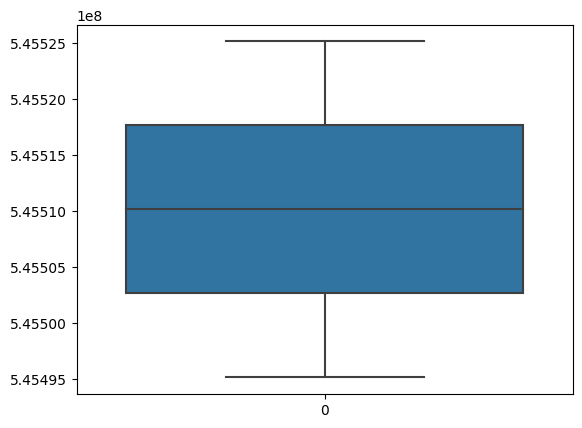

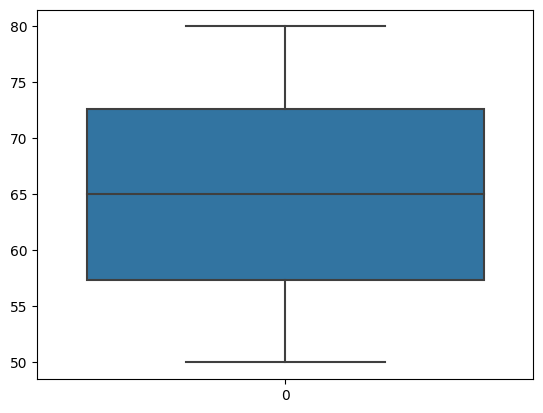

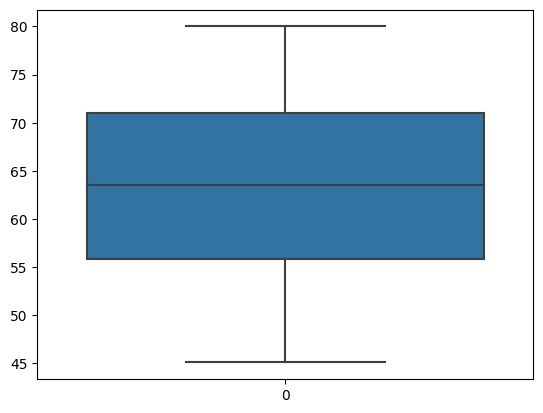

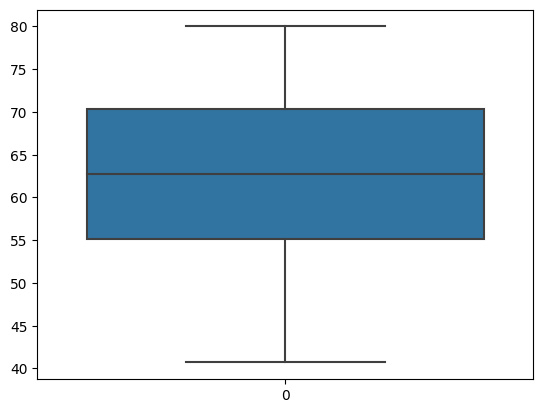

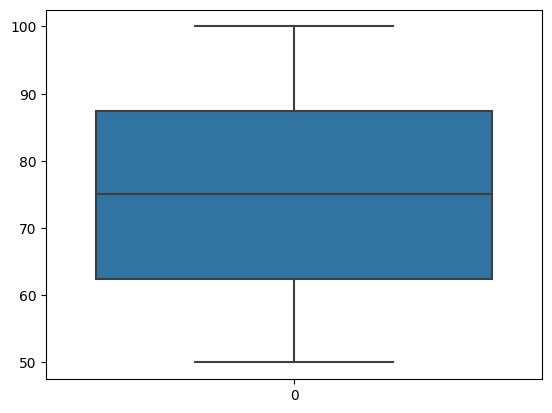

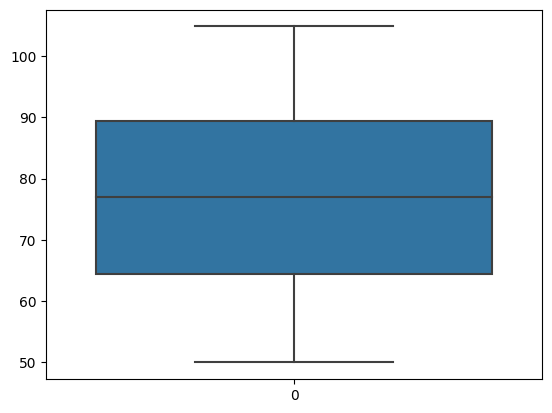

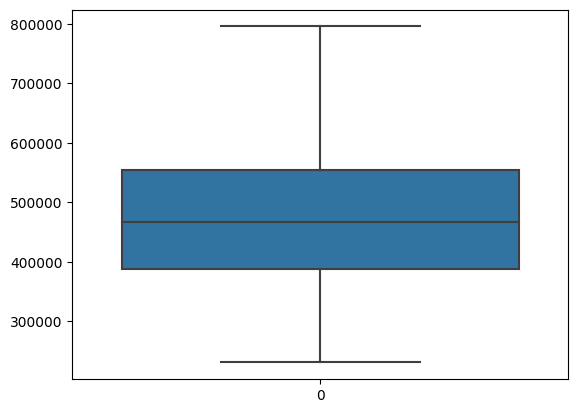

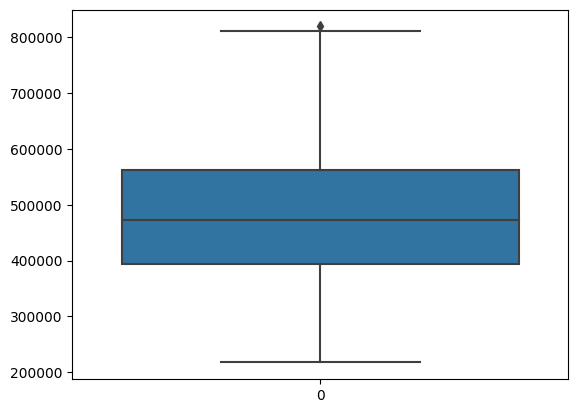

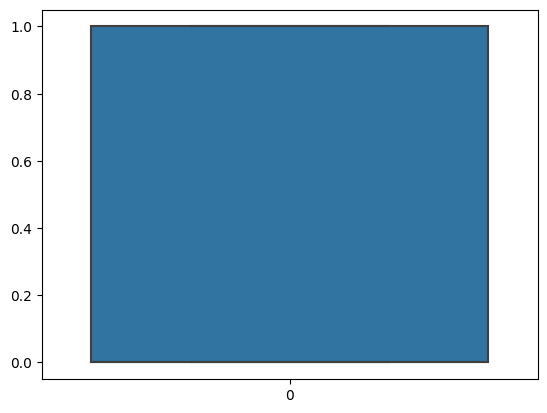

In [15]:
for i in df:
    #print(i)
    if df[i].dtypes==np.int64 or df[i].dtypes==np.float64:
        plt.figure()
        sns.boxplot(df[i])

##### SLICING the numeric and categorical columns

In [16]:
b= df.iloc[:,[7,8,9,12,13,15,16,17]]
d= df.iloc[:, [0,1,2,3,4,5,6,10,11,14]]

### Removing outliers


In [17]:
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Quan_send_by_vendor' ,'Quan_rec_by_procurement',
                           'Quan_send_by_procurement' ,'Unit_Purchase_Price' ,'Unit_Selling_price',
                           'Total_purchase_price', 'Total_Selling_price', 'Fraud'])


In [18]:
df_t = winsor.fit_transform(df[['Quan_send_by_vendor' ,'Quan_rec_by_procurement',
                                'Quan_send_by_procurement' ,'Unit_Purchase_Price' ,'Unit_Selling_price',
                                'Total_purchase_price', 'Total_Selling_price', 'Fraud']])


<AxesSubplot: >

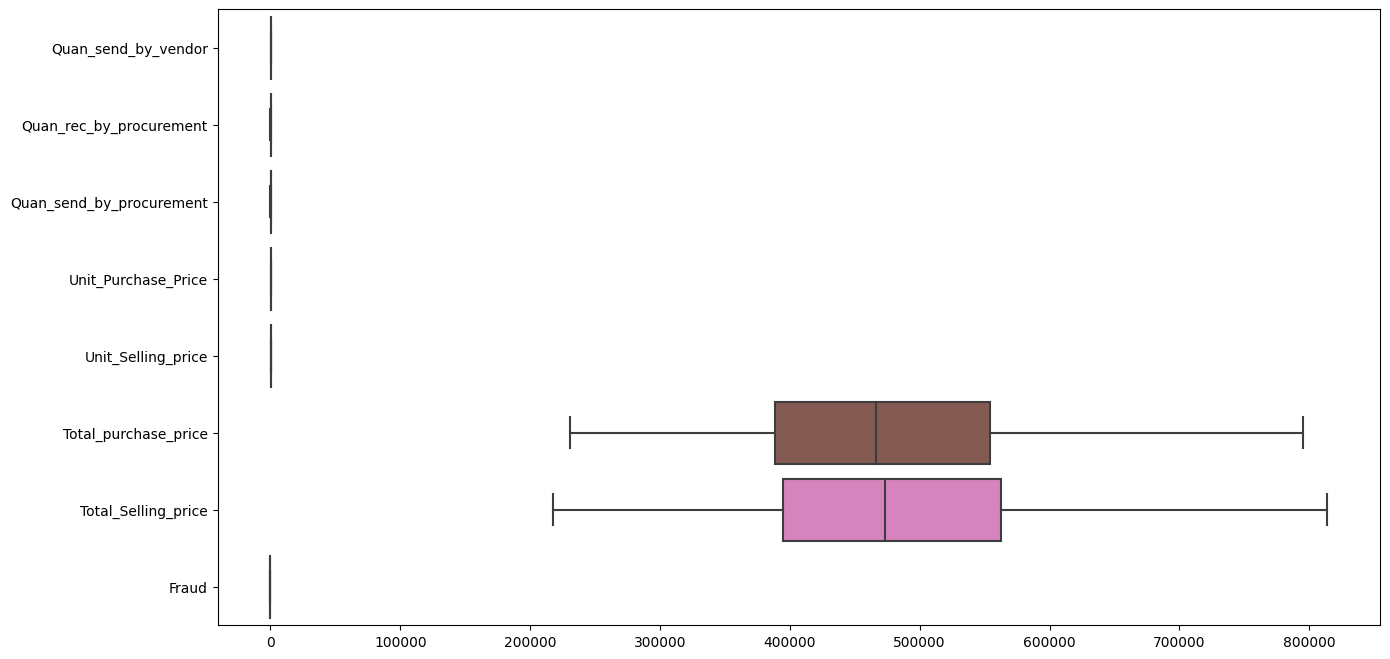

In [19]:
plt.figure(figsize=(15,8))

sns.boxplot(data=df_t, orient='h')

#Now no outliers are present


### Label Encoder

In [20]:
# Creating instance of labelencoder
labelencoder = LabelEncoder()

In [21]:
d['InvoiceID'] = labelencoder.fit_transform(d['InvoiceID'])
d['PO_Id'] = labelencoder.fit_transform(d['PO_Id'])
d['Purchase_date'] = labelencoder.fit_transform(d['Purchase_date'])
d['Vendor_name'] = labelencoder.fit_transform(d['Vendor_name'])
d['Category'] = labelencoder.fit_transform(d['Category'])
d['Name_Grocery'] = labelencoder.fit_transform(d['Name_Grocery'])
d['Item_Number'] = labelencoder.fit_transform(d['Item_Number'])
d['Approval_oficer_name'] = labelencoder.fit_transform(d['Approval_oficer_name'])
d['Requesting_officer_name'] = labelencoder.fit_transform(d['Requesting_officer_name'])
d['Eligibility_Criteria'] = labelencoder.fit_transform(d['Eligibility_Criteria'])


# Concating winsored columns and encoded columns


In [22]:
data= pd.concat([d,df_t], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   InvoiceID                 30000 non-null  int64  
 1   PO_Id                     30000 non-null  int32  
 2   Purchase_date             30000 non-null  int32  
 3   Vendor_name               30000 non-null  int32  
 4   Category                  30000 non-null  int32  
 5   Name_Grocery              30000 non-null  int32  
 6   Item_Number               30000 non-null  int32  
 7   Approval_oficer_name      30000 non-null  int32  
 8   Requesting_officer_name   30000 non-null  int32  
 9   Eligibility_Criteria      30000 non-null  int32  
 10  Quan_send_by_vendor       30000 non-null  float64
 11  Quan_rec_by_procurement   30000 non-null  float64
 12  Quan_send_by_procurement  30000 non-null  float64
 13  Unit_Purchase_Price       30000 non-null  float64
 14  Unit_S

## Normalization (for numeric columns)

In [23]:
def norm_func(i): 
    x = (i-i.min())/(i.max()-i.min())
    return(x)

df_norm = norm_func(data)
c = df_norm.describe()

### REARRANGING THE DATA and  Data Manupulation


In [24]:
final= df_norm.iloc[:,[0,1,2,3,4,5,6,10,11,12,7,8,13,14,9,15,16,17]]
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   InvoiceID                 30000 non-null  float64
 1   PO_Id                     30000 non-null  float64
 2   Purchase_date             30000 non-null  float64
 3   Vendor_name               30000 non-null  float64
 4   Category                  30000 non-null  float64
 5   Name_Grocery              30000 non-null  float64
 6   Item_Number               30000 non-null  float64
 7   Quan_send_by_vendor       30000 non-null  float64
 8   Quan_rec_by_procurement   30000 non-null  float64
 9   Quan_send_by_procurement  30000 non-null  float64
 10  Approval_oficer_name      30000 non-null  float64
 11  Requesting_officer_name   30000 non-null  float64
 12  Unit_Purchase_Price       30000 non-null  float64
 13  Unit_Selling_price        30000 non-null  float64
 14  Eligib

### Checking for balanced or not

<AxesSubplot: xlabel='Fraud'>

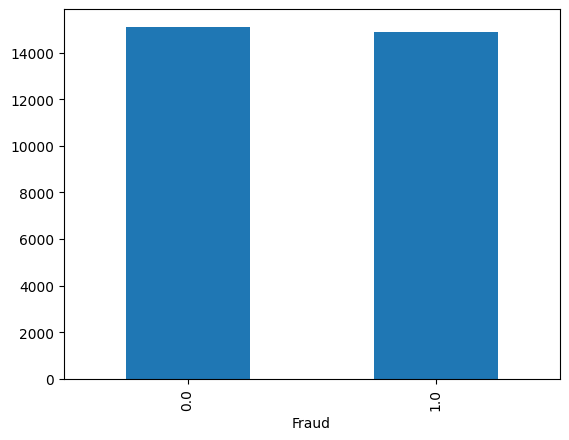

In [25]:
final.pivot_table(index='Fraud', aggfunc='size').plot(kind='bar')

#### Observation: Data is balanced

In [26]:
######## SAVING THE DATAFRAME IN CSV FORMAT IN DISK ##########
#final.to_csv("final.csv", encoding="utf-8")
#import os
#os.getcwd()

## AUTOMATED EDA

In [27]:
import sweetviz
report= sweetviz.analyze(final)
report.show_html('FinalReport.html')

                                             |                                             | [  0%]   00:00 ->…

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [28]:
#import dtale
#d= dtale.show(final)
#d.open_browser()


In [29]:
#from autoviz.AutoViz_Class import AutoViz_Class
#av= AutoViz_Class()
#dd= av.AutoViz(final)

In [30]:
#import pandas_profiling
#pandas_profiling.ProfileReport(final)

## Correlation


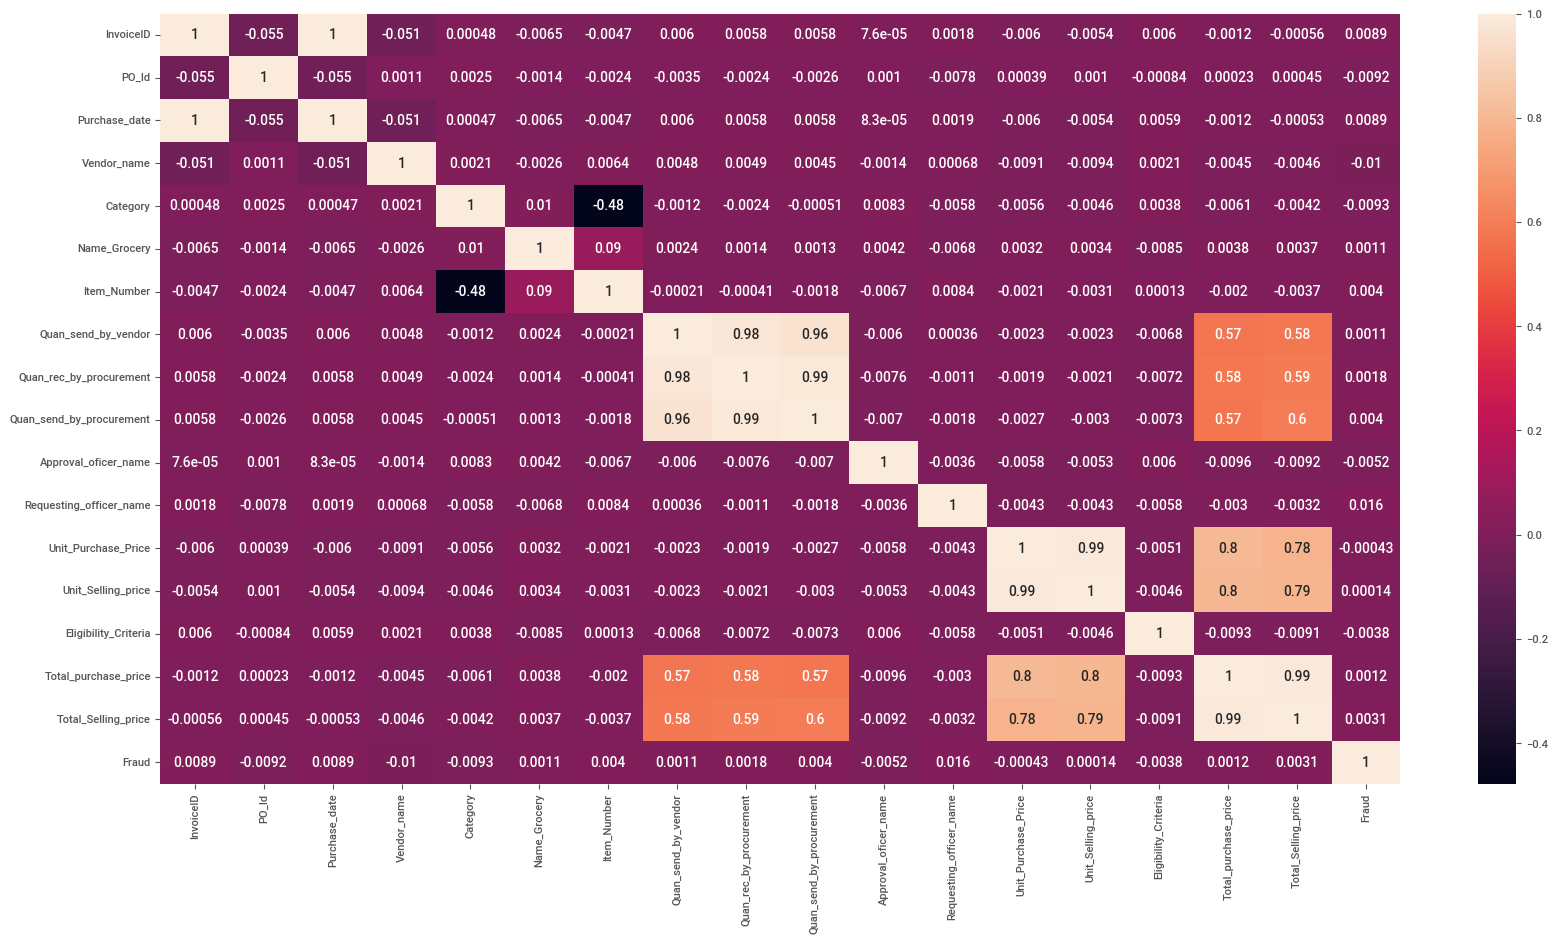

In [28]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(20,10))
sns.heatmap(final.corr(),annot=True)
plt.show()

### Checking for multicollenearity

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = final.columns

In [30]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(final.values, i)
                          for i in range(len(final.columns))]
  
print(vif_data)

                     feature            VIF
0                  InvoiceID  405160.399515
1                      PO_Id       3.933843
2              Purchase_date  404383.844519
3                Vendor_name       3.808641
4                   Category       4.815319
5               Name_Grocery       3.886187
6                Item_Number       4.838734
7        Quan_send_by_vendor     119.681158
8    Quan_rec_by_procurement    1932.228102
9   Quan_send_by_procurement    1722.100249
10      Approval_oficer_name       3.744496
11   Requesting_officer_name       3.829276
12       Unit_Purchase_Price    2321.651749
13        Unit_Selling_price    1985.076967
14      Eligibility_Criteria       3.925741
15      Total_purchase_price    4550.320556
16       Total_Selling_price    4028.326145
17                     Fraud       1.967538



#### Dropping Total_purchase_price as it shows more VIF value.

In [31]:
final = final.drop(['InvoiceID','PO_Id','Purchase_date','Vendor_name','Approval_oficer_name','Requesting_officer_name','Total_purchase_price'], axis= 1)

In [32]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Category                  30000 non-null  float64
 1   Name_Grocery              30000 non-null  float64
 2   Item_Number               30000 non-null  float64
 3   Quan_send_by_vendor       30000 non-null  float64
 4   Quan_rec_by_procurement   30000 non-null  float64
 5   Quan_send_by_procurement  30000 non-null  float64
 6   Unit_Purchase_Price       30000 non-null  float64
 7   Unit_Selling_price        30000 non-null  float64
 8   Eligibility_Criteria      30000 non-null  float64
 9   Total_Selling_price       30000 non-null  float64
 10  Fraud                     30000 non-null  float64
dtypes: float64(11)
memory usage: 2.5 MB


#### Again Checking VIF VALUE

In [36]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = final.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(final.values, i)
                          for i in range(len(final.columns))]
  
print(vif_data)

                     feature         VIF
0                   Category    4.560001
1               Name_Grocery    3.836532
2                Item_Number    4.593551
3        Quan_send_by_vendor  118.864509
4    Quan_rec_by_procurement  502.839960
5   Quan_send_by_procurement  308.682209
6        Unit_Purchase_Price  301.576499
7         Unit_Selling_price  388.574885
8       Eligibility_Criteria    3.848774
9        Total_Selling_price  253.309491
10                     Fraud    1.954597


#### As we can see, Quan_send_by_vendor, Quan_rec_by_procurement,Quan_send_by_procurement, Unit_Purchase_Price, Unit_Selling_price and Total_Selling_price have very high values of VIF, indicating that these variables are highly correlated. Hence, considering these features together leads to a model with high multicollinearity. 

## Spliting data into train and test 

In [48]:
X= final.iloc[:,0:10]
y= final.iloc[:, 10]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0,stratify=y)
X_train.shape, X_test.shape

((24000, 10), (6000, 10))

In [50]:
def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues',colorbar=True,ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [51]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores


#### defining empty lists to add train and test results 

In [52]:
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
def add_score_model(score):
     '''add score of modelto list'''
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

In [53]:
final['Fraud'] = (final.Fraud > 0).astype(int)

# Model building

## Logistic Regression 


In [43]:
# instantiate the model
logreg = LogisticRegression()

In [44]:
# fit the model
logreg.fit(X_train, y_train)    

LogisticRegression()

#### Cross Validation

In [45]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(logreg, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)

Cross Validation Scores:  [0.50316667 0.4935     0.4955     0.49766667 0.4995    ]


In [46]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error -0.497867


Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.503042,0.494833,0.363797,0.34207,0.498733,0.486848,0.42071,0.401816


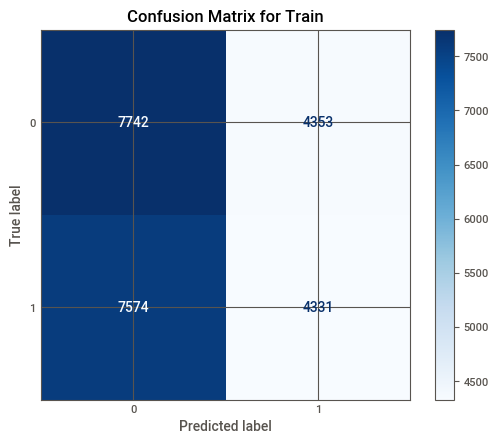

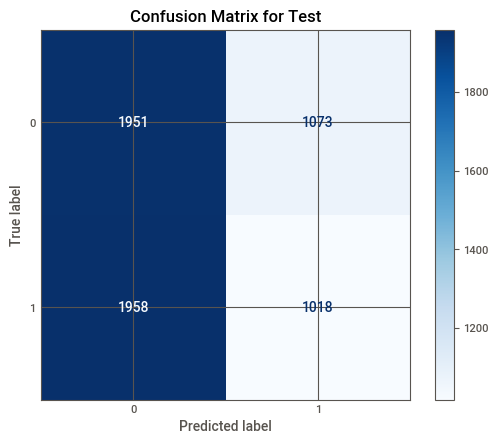

In [47]:
logreg_score=get_metrics_score(logreg,X_train,X_test,y_train,y_test)

add_score_model(logreg_score)   

## Decision tree 

In [48]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.5035,1.0,0.501008,1.0,0.499497,1.0,0.500252


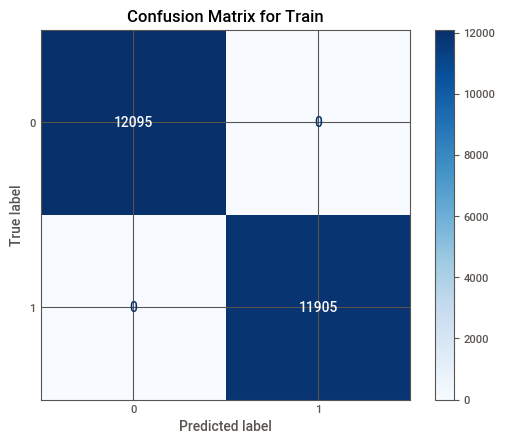

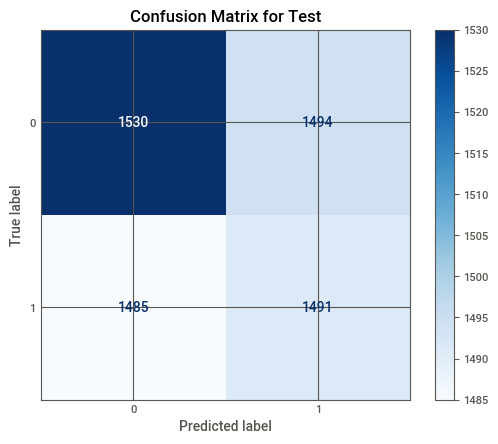

In [49]:
dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)
add_score_model(dtree_score)

### Observation

 Decision tree is overfitting the training data as there is lot of disparity between test and train.

### Tuning Decision tree

In [50]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier()

In [51]:
# Grid of parameters to choose from
parameters = {'max_depth': [1,4,7,15], 
              'min_samples_leaf': [2,3,5],
              'max_leaf_nodes' : [ 5,7,10,15]
              }

In [52]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

In [53]:
# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

In [54]:
# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

In [55]:
# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7, min_samples_leaf=2)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.5085,0.506833,0.040319,0.03293,0.564042,0.547486,0.075259,0.062124


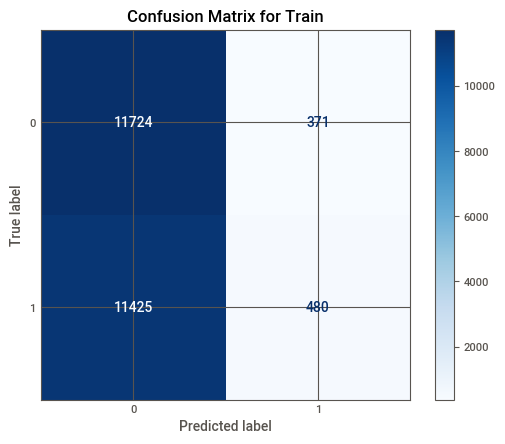

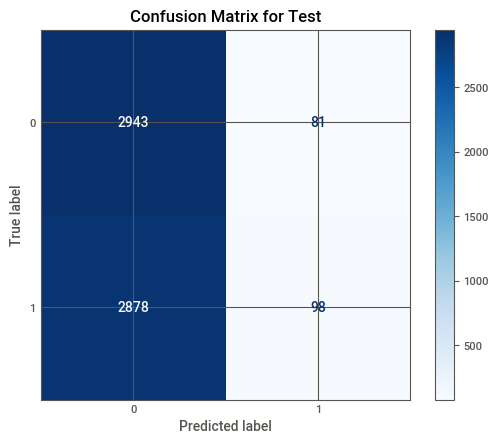

In [56]:
score_tune_dt=get_metrics_score(dtree_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_dt) # add score to dataframe

## Bagging Classifier 

In [57]:
#Fitting the model
bagging_classifier = BaggingClassifier()
bagging_classifier.fit(X_train,y_train)

BaggingClassifier()

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.983,0.493167,0.971273,0.382728,0.994325,0.486129,0.982663,0.428276


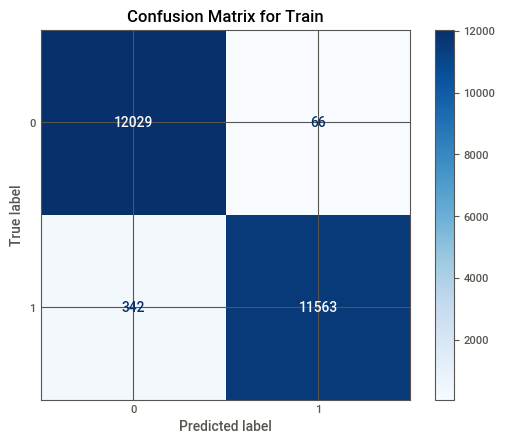

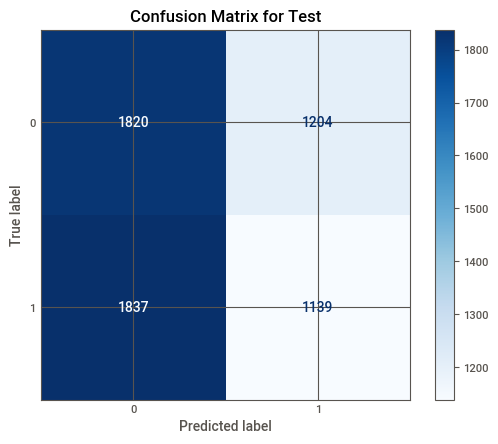

In [58]:
bagging_score=get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test)
add_score_model(bagging_score)

### Observation

Bagging is still overfitting the training data 

### Tuning  Bagging Classifier

In [59]:
# Choose the type of classifier. 

bagging_estimator_tuned = BaggingClassifier(DecisionTreeClassifier())

In [60]:
# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

In [61]:
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

In [62]:
# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [63]:
# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

In [64]:
# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=1,
                  max_samples=1, n_estimators=20)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.503958,0.504,0.0,0.0,0.0,0.0,0.0,0.0


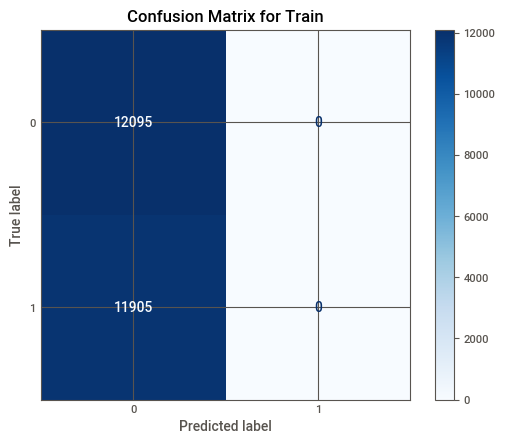

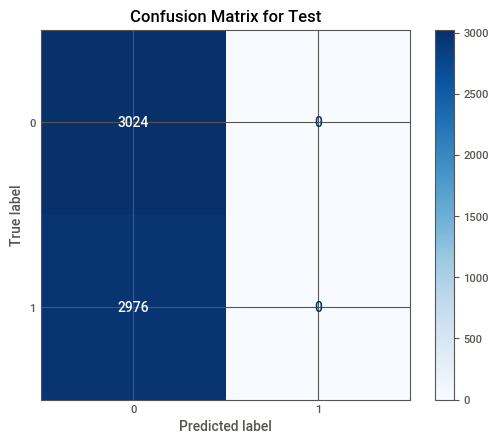

In [65]:
bagging_tuned=get_metrics_score(bagging_estimator_tuned,X_train,X_test,y_train,y_test)
add_score_model(bagging_tuned)

## Random Forest 

In [66]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.489,1.0,0.461358,1.0,0.484133,1.0,0.472471


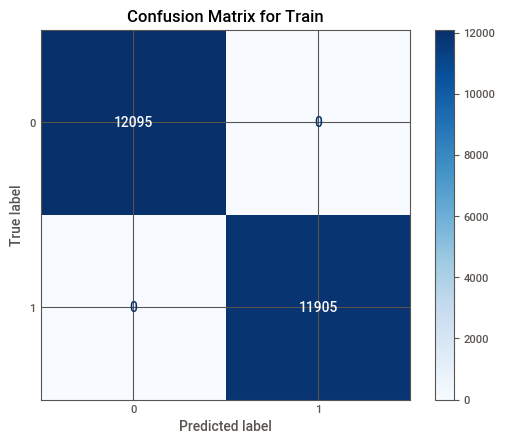

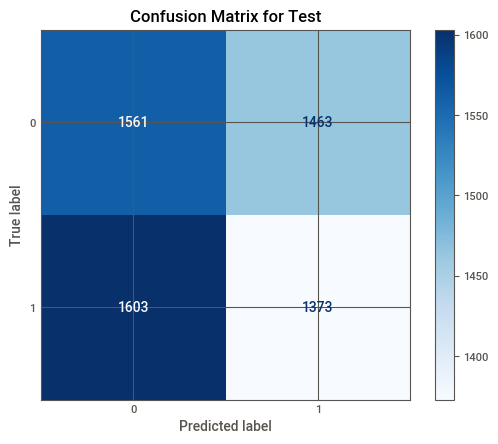

In [67]:
score_list_rf=get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)

### Tuning Random Forest 

In [68]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.20,1:0.80},random_state=1)

In [69]:
parameters = { "max_depth":[5,9,15],
               "n_estimators": [150,200,250,500],
               "min_samples_leaf": np.arange(5, 10),
                "max_features": ['auto'],
                "max_samples": np.arange(0.3,0.5, 0.7)
              }

In [70]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

In [71]:
# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

In [72]:
# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

In [73]:
# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_samples=0.3, min_samples_leaf=5, n_estimators=150,
                       random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.496042,0.496,1.0,1.0,0.496042,0.496,0.663139,0.663102


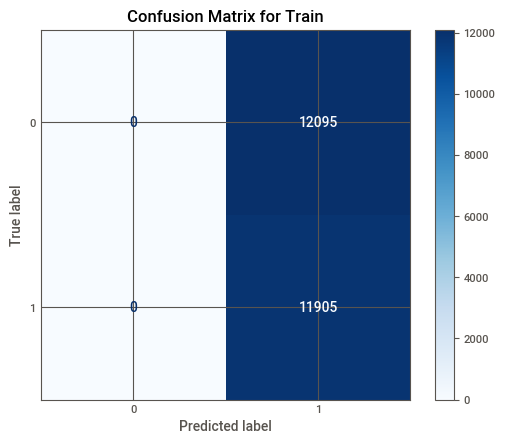

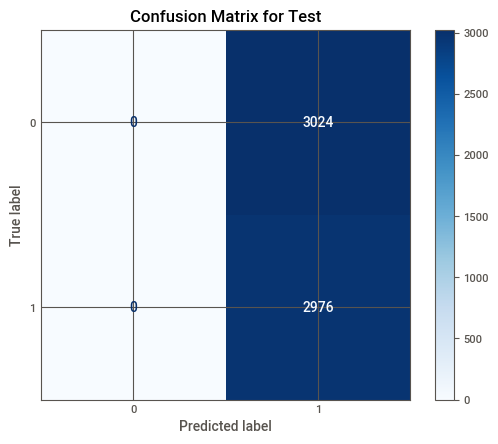

In [74]:
score_tune_rt=get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_rt) 

# Comparision

In [75]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression ',
                                          'Decision Tree',
                                          'Tuned Decision Tree',
                                          'Bagging Classifier',
                                          'Tuned Bagging Classifier',
                                          'Random Forest',
                                          'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 



In [76]:
#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Train_Accuracy',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
1,Decision Tree,1.000000,0.503500,1.000000,0.501008,1.000000,0.499497,1.000000,0.500252
5,Random Forest,1.000000,0.489000,1.000000,0.461358,1.000000,0.484133,1.000000,0.472471
3,Bagging Classifier,0.983000,0.493167,0.971273,0.382728,0.994325,0.486129,0.982663,0.428276
2,Tuned Decision Tree,0.508500,0.506833,0.040319,0.032930,0.564042,0.547486,0.075259,0.062124
4,Tuned Bagging Classifier,0.503958,0.504000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,Logistic Regression,0.503042,0.494833,0.363797,0.342070,0.498733,0.486848,0.420710,0.401816
6,Tuned Random Forest,0.496042,0.496000,1.000000,1.000000,0.496042,0.496000,0.663139,0.663102


# Ada Boosting

In [77]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.527875,0.5015,0.440907,0.415995,0.52892,0.496989,0.48092,0.452899


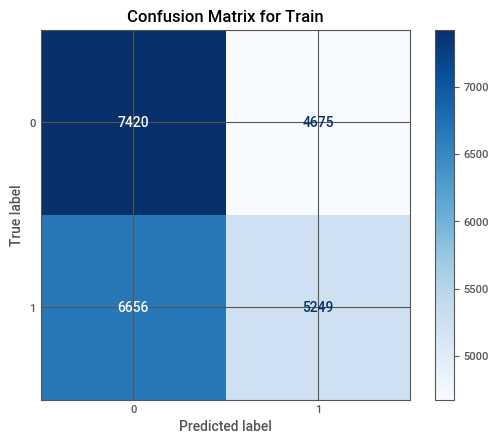

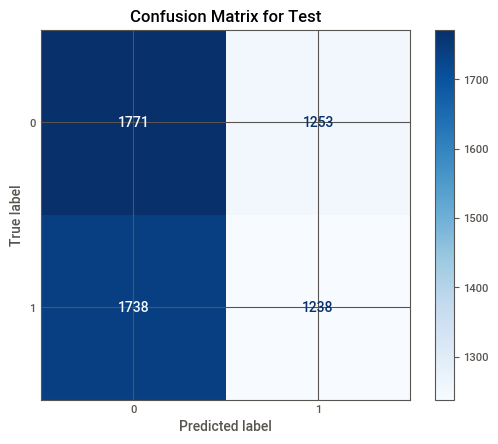

In [78]:
adaboost_score=get_metrics_score(adaboost,X_train,X_test,y_train,y_test)
add_score_model(adaboost_score)

## Gradient Boosting

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.56325,0.503667,0.424948,0.362903,0.581829,0.499537,0.491165,0.420397


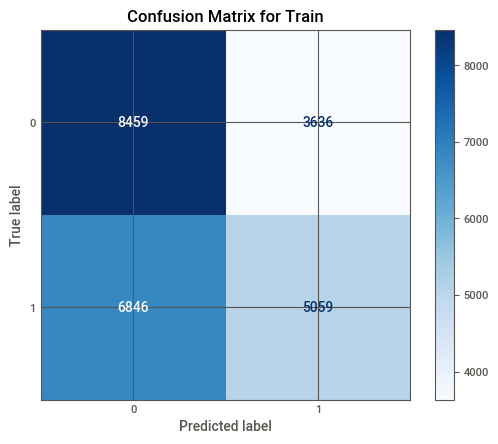

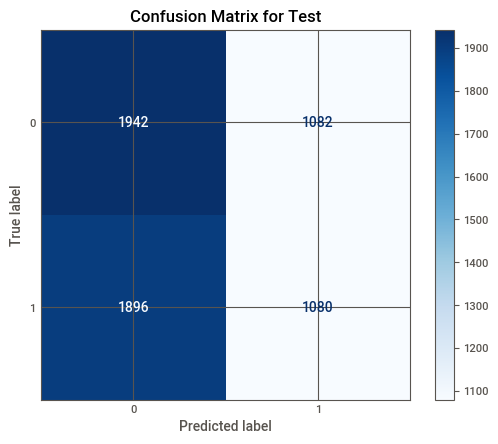

In [79]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)
gbc_score=get_metrics_score(gbc,X_train,X_test,y_train,y_test)
add_score_model(gbc_score)

## Comparision

In [80]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression',
                                          'Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

In [81]:
#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Train_Accuracy',ascending=True)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
6,Tuned Bagging Classifier,0.496042,0.496000,1.000000,1.000000,0.496042,0.496000,0.663139,0.663102
0,Logistic Regression,0.503042,0.494833,0.363797,0.342070,0.498733,0.486848,0.420710,0.401816
4,Tuned Decision Tree,0.503958,0.504000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Random Forest,0.508500,0.506833,0.040319,0.032930,0.564042,0.547486,0.075259,0.062124
7,AdaBoost,0.527875,0.501500,0.440907,0.415995,0.528920,0.496989,0.480920,0.452899
8,Gradient Boost,0.563250,0.503667,0.424948,0.362903,0.581829,0.499537,0.491165,0.420397
3,Bagging Classifier,0.983000,0.493167,0.971273,0.382728,0.994325,0.486129,0.982663,0.428276
1,Decision Tree,1.000000,0.503500,1.000000,0.501008,1.000000,0.499497,1.000000,0.500252
5,Tuned Random Forest,1.000000,0.489000,1.000000,0.461358,1.000000,0.484133,1.000000,0.472471


## Observations

Logistic regression gives a more generalized model.
Adaboost seems good. 

# Stacking

In [82]:
SupportVectorMachine = SVC()
KNeighbors = KNeighborsClassifier()
RandomForest = RandomForestClassifier(max_depth = 1,random_state=1)
ExtraTree = ExtraTreeClassifier()
GradientBoost = GradientBoostingClassifier()
AdaBoost = AdaBoostClassifier(DecisionTreeClassifier())
dtr = DecisionTreeClassifier(max_depth=4)

In [83]:
stacking_model = StackingClassifier(
    estimators=[
        ('SupportVectorMachine', SupportVectorMachine),
        ('KNeighbors', KNeighbors),
        ('RandomForest', RandomForest),
        ('ExtraTree', ExtraTree),
        ('GBDT', GradientBoost),
        ('AdaBoost', AdaBoost),
        ('dtr',dtr)
        ],
    final_estimator=LogisticRegression(), stack_method='auto'
)

In [84]:
final_model = stacking_model


final_model.fit(X_train, y_train)


StackingClassifier(estimators=[('SupportVectorMachine', SVC()),
                               ('KNeighbors', KNeighborsClassifier()),
                               ('RandomForest',
                                RandomForestClassifier(max_depth=1,
                                                       random_state=1)),
                               ('ExtraTree', ExtraTreeClassifier()),
                               ('GBDT', GradientBoostingClassifier()),
                               ('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
                               ('dtr', DecisionTreeClassifier(max_depth=4))],
                   final_estimator=LogisticRegression())

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.17175,0.497333,0.018228,0.349798,0.025812,0.490575,0.021367,0.408395


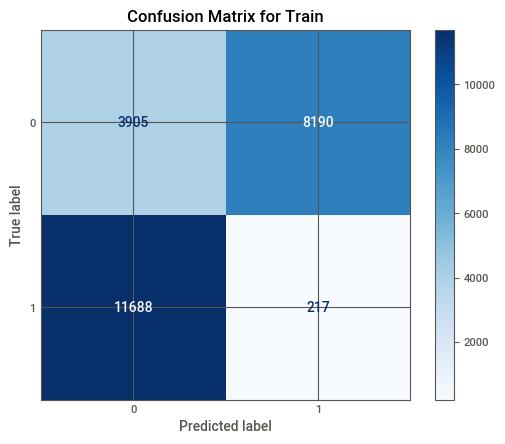

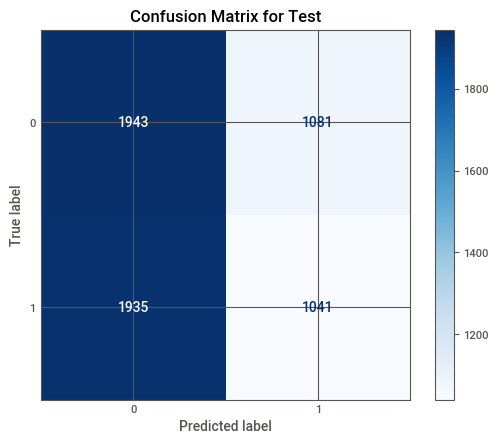

In [85]:
score_stacking =  get_metrics_score(final_model,X_train,X_test,y_train,y_test)
add_score_model(score_stacking)


# Comparision

In [86]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression ',
                                          'Decision Tree',
                                          'Tuned Decision Tree',
                                          'Bagging Classifier',
                                          'Tuned Bagging Classifier',
                                          'Random Forest',
                                          'Tuned Random Forest',
                                          'AdaBoosting',
                                          'Gradient Boosting',
                                          'Stacking'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train
                                          })


In [87]:
comparison_frame.sort_values(by=['Train_Accuracy','Train_Recall'],ascending=True) 

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1
9,Stacking,0.171750,0.497333,0.018228,0.349798,0.025812,0.490575,0.021367
6,Tuned Random Forest,0.496042,0.496000,1.000000,1.000000,0.496042,0.496000,0.663139
0,Logistic Regression,0.503042,0.494833,0.363797,0.342070,0.498733,0.486848,0.420710
4,Tuned Bagging Classifier,0.503958,0.504000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Tuned Decision Tree,0.508500,0.506833,0.040319,0.032930,0.564042,0.547486,0.075259
7,AdaBoosting,0.527875,0.501500,0.440907,0.415995,0.528920,0.496989,0.480920
8,Gradient Boosting,0.563250,0.503667,0.424948,0.362903,0.581829,0.499537,0.491165
3,Bagging Classifier,0.983000,0.493167,0.971273,0.382728,0.994325,0.486129,0.982663
1,Decision Tree,1.000000,0.503500,1.000000,0.501008,1.000000,0.499497,1.000000
5,Random Forest,1.000000,0.489000,1.000000,0.461358,1.000000,0.484133,1.000000


In [88]:
#pip install auto-sklearn

In [89]:
#pip install tpot

## AutoML

In [54]:
import tpot

In [55]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_Fraud .py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: DecisionTreeClassifier(SelectPercentile(input_matrix, percentile=18), criterion=entropy, max_depth=9, min_samples_leaf=7, min_samples_split=19)
0.5038333333333334


In [56]:
tpot_data = final
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Category                  30000 non-null  float64
 1   Name_Grocery              30000 non-null  float64
 2   Item_Number               30000 non-null  float64
 3   Quan_send_by_vendor       30000 non-null  float64
 4   Quan_rec_by_procurement   30000 non-null  float64
 5   Quan_send_by_procurement  30000 non-null  float64
 6   Unit_Purchase_Price       30000 non-null  float64
 7   Unit_Selling_price        30000 non-null  float64
 8   Eligibility_Criteria      30000 non-null  float64
 9   Total_Selling_price       30000 non-null  float64
 10  Fraud                     30000 non-null  int32  
dtypes: float64(10), int32(1)
memory usage: 2.4 MB


In [57]:
features = tpot_data.drop('Fraud', axis=1)

In [58]:
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['Fraud'], random_state=None)


In [59]:
exported_pipeline = SGDClassifier(alpha=0.001, eta0=0.1, fit_intercept=False, l1_ratio=0.75, learning_rate="invscaling", loss="log", penalty="elasticnet", power_t=0.5)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.505378,0.499733,0.0,0.0,0.0,0.0,0.0,0.0


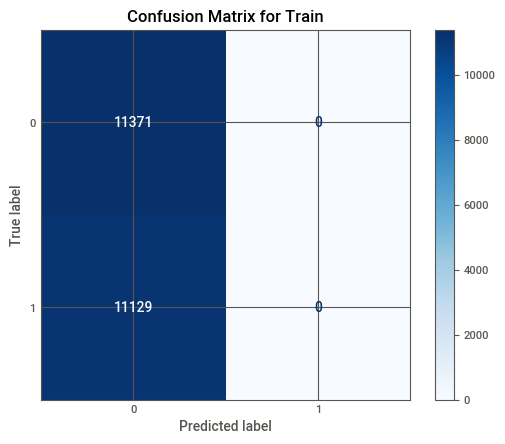

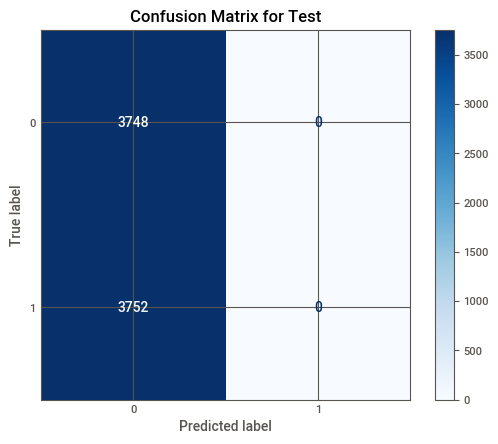

In [60]:
score_pipeline =  get_metrics_score(exported_pipeline,training_features, testing_features, training_target, testing_target)

In [61]:
import pickle 


In [62]:
pickle.dump(exported_pipeline, open('Fraud_detection.pkl', 'wb'))